<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 01 - IA**

## **Outline**

1. [Ejercicio 1. Numpy](#eje1)
2. [Ejercicio 2. Pandas](#eje2)
3. [Ejercicio 3. Pandas - estadistica](#eje3)
4. [Ejercicio 4. estadistica](#eje4)

In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-q01/')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-q01


---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

# **Ejercicio 1**  <a name="eje1"></a>

Contruya una función, que retorne una matriz $N \times N$, siguiendo las siguientes instrucciones. 

- La función debe recibir el parámetro $N$ que indicará el tamaño de la matriz.
- En el triángulo superior de la matriz (incluyendo la diagonal principal) se debe repetir el valor $N$. 
- En el triángulo inferior de la matriz (sin incluir la diagonal principal), las columnas deben aumentar en uno con respecto a $N$.<br>
Por ejemplo con $N=5$ la matriz resultante es: 

```
[[5 5 5 5 5]
 [6 5 5 5 5]
 [6 7 5 5 5]
 [6 7 8 5 5]
 [6 7 8 9 5]]
```


- Calcule la mediana a nivel de columnas y el mínimo a nivel de filas.


In [24]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas
def fun_11251120(N):
    import numpy as np 
    Z = np.full((N,N), N)
    
    for i in range(len(Z)):
      c=1
      for j in range(len(Z[i])):
        if i-1>=j:
          Z[i][j] +=c
          c+=1
    median = np.array([np.median(Z[:,i]) for i in range(N)])
    min  = np.array([np.min(Z[i,:]) for i in range(N)])
    return Z, median, min

import urllib.parse, inspect
src11251120 = urllib.parse.quote_plus(inspect.getsource(fun_11251120))

In [25]:
#@title **verifique su respuesta**
import numpy as np
mat, median, min = fun_11251120(10)
print("matriz:\n ")
print(mat)
print("medians:\n ", median)
print("min:\n ", min)

matriz:
 
[[10 10 10 10 10 10 10 10 10 10]
 [11 10 10 10 10 10 10 10 10 10]
 [11 12 10 10 10 10 10 10 10 10]
 [11 12 13 10 10 10 10 10 10 10]
 [11 12 13 14 10 10 10 10 10 10]
 [11 12 13 14 15 10 10 10 10 10]
 [11 12 13 14 15 16 10 10 10 10]
 [11 12 13 14 15 16 17 10 10 10]
 [11 12 13 14 15 16 17 18 10 10]
 [11 12 13 14 15 16 17 18 19 10]]
medians:
  [11.  12.  13.  14.  12.5 10.  10.  10.  10.  10. ]
min:
  [10 10 10 10 10 10 10 10 10 10]


In [26]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_11251120 $src11251120

evaluation result CORRECT


---
## **Dataset de enfermedades cardiacas**

En los siguientes puntos vamos a explorar un dataset que describe un conjunto de datos relacionados con enfermedades cardiacas. El dataset esta compuesto por 303 pacientes, descritos por un total de 14 variables, tales como: 

- la edad
- valores de la presión
- niveles de colesterol, entre otros

Mayor información puede consultarlo en: [DataSet Info](https://www.kaggle.com/ronitf/heart-disease-uci).  El `target` indica si el paciente tiene una enfermedad cardiaca (valor de uno) o no tiene enfermedades cardiacas (valor de cero). Observe el dataset en las siguientes lineas y tenga en cuenta el `dataframe` donde quedaron almacenados los valores para ser trabajados en los siguientes puntos. 


---

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


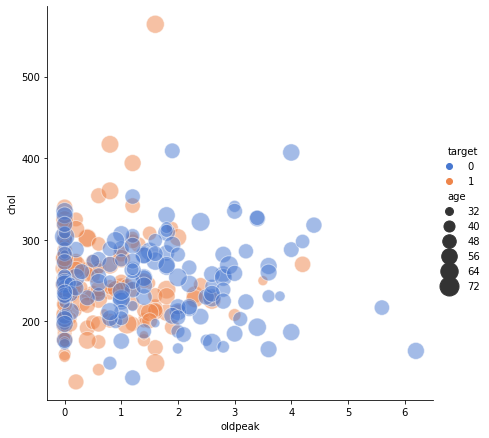

In [23]:
#@title **Heart diseases dataset**
variable_x = "oldpeak" #@param {type:"string"}
variable_y = "chol" #@param {type:"string"}
variable_s = "age" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("data/heart.csv") 
print(data_h.shape)


sns.relplot(x=variable_x, y=variable_y, hue="target", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_h);
            

data_h.head(3)

# **Ejercicio 2**  <a name="eje2"></a>

**Vamos a agregar DOS nuevas variables al dataframe**

Escriba una función que reciba el dataframe que contiene los datos de las enfermedades cardiacas (`data_h`). Entonces: 

- Defina una **NUEVA** variable con el nombre `cor_mov`, como la correlación movil con una ventana de 100, entre las variables (`age`, `oldpeak`).

- Complete los valores `NaN` de `cor_mov` con el valor mínimo de `cor_mov`. 

- Defina una **NUEVA** variable con el nombre `rando`. Para ello cree una distribución normal de la variable `thalach`. Es decir una distribución normal con la media y desviación estandar de `thalach`. Luego tome `303` valores aleatorios de esta distribución para llenar la nueva variable `rando`. 
- Retorne el dataframe con las nuevas variables. 

In [80]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_22261120(data_h):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats

    
    data_h["cor_mov"] = data_h.age.rolling(window=100).corr(other=data_h.oldpeak)
    data_h.cor_mov.fillna(np.min(data_h.cor_mov), inplace=True)
    norm = stats.norm(loc=np.mean(data_h.thalach), scale=np.std(data_h.thalach))
    data_h['rando'] = norm.rvs(303)
    return data_h

import urllib.parse, inspect
src22261120 = urllib.parse.quote_plus(inspect.getsource(fun_22261120))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  cor_mov   303 non-null    float64
 15  rando     303 non-null    float64
dtypes: float64(3), int64(13)
memory usage: 38.0 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cor_mov,rando
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.072778,213.064528
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.072778,125.788551
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.072778,191.770153
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.072778,138.557153
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.072778,129.129060


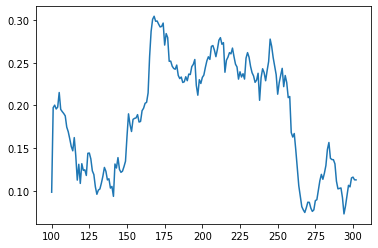

In [81]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import seaborn as sns

data_h = pd.read_csv("data/heart.csv")
data_h = fun_22261120(data_h)
data_h.cor_mov[100:].plot();
data_h.info()
data_h.head()

In [82]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_22261120 $src22261120

(303, 16)
149.76655899047194 150.20930868750878
evaluation result CORRECT


# **Ejercicio 3**  <a name="eje3"></a>

**Visualizar con violinplots e histogramas en 2D**

Ahora vamos a visualizar cada una de las variables de nuestro dataset utilizando graficos de tipo "violinplot" e histogramas en **2D**. Para ello vamos a crear una función que: 
-  Reciba el dataframe del corazón
-  Realice un gráfico `violinplot` utilizando **seaborn**, donde en el eje $x$ tengamos la variable `target`, en el eje $y$ la variable `chol` y como parametro `hue` la variable `cp`
-  Contruya dos distribuciones scipy.stats, como: 
  - una distribución normal de `oldpeak`
  - una distribución de poisson con la variable `trestbps`. Recuerde que en Poisson solo la media es suficiente. 
- Calcule `100000` muestras aleatorias de cada distribución definida anteriormente
- Estime un histograma en 2D, utilizando **matplotlib** con los dos conjuntos de muestras. 

- Retorne una lista con el objeto `plt` y el resultado del histograma 2D



In [85]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_23261120(data_h):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import seaborn as sns
 
    dist0= stats.norm(loc=np.mean(data_h.oldpeak), scale=np.std(data_h.oldpeak))
    dist1= stats.poisson(np.mean(data_h.trestbps))
    rando0= dist0.rvs(100000) 
    rando1= dist1.rvs(100000)
    
    plt.figure(figsize = (10, 5))
    ax=plt.subplot(1,2,1)
    b = plt.hist2d(x=rando0,y=rando1,bins=100,density=True)  # histogram 2d here
    
    ax=plt.subplot(1,2,2)
    sns.violinplot(x= data_h.target,y= data_h.chol,hue= data_h.cp)# violinplot Here
    
    return [plt, b ]

import urllib.parse, inspect
src23261120 = urllib.parse.quote_plus(inspect.getsource(fun_23261120))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

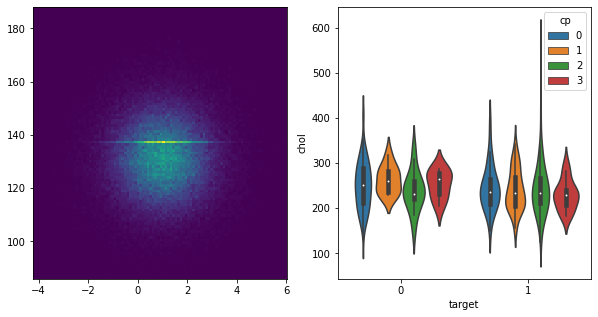

In [78]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fun_23261120(data_h)[0]

In [79]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_23261120 $src23261120

(100, 100)
evaluation result CORRECT


# **Ejercicio 4**  <a name="eje4"></a>


**Usamos CLT de forma EMPÍRICA**

Escriba una función que reciba el dataset `data_h`, y el valor  `N` para realizar el CLT de manera **empírica**. La función debe: 

- Calcular las distribuciones normales **solamente** para las variables: `["chol",	"thalach",		"oldpeak"]`

-  Discriminar las variables entre `enfermo` cuando `"target==1"` y `sano` cuando `"target=="0"`. Es decir, por cada variable considerada se obtendrán dos distribuciones. `(Seis en total)`

-  Retornar dos arreglos (`sano_array, enfe_array`), cada uno de los cuales contiene los 1000 experimentos realizados con `N` samples para las 3 variables.

- Retornar una lista `p_s` con los objetos `scipy` para las distribuciones normales que representan la población `sano`. 

- Retornar una lista `p_e` con los objetos `scipy` para las distribuciones normales que representan la población `enfermo`.







In [83]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_24261120(data_h, N):
  import numpy as np 
  import pandas as pd
  import scipy.stats as stats
  
  data_h_temp = data_h.copy()
  target = data_h_temp["target"].values
  del data_h_temp["target"]
  data_sel_sano = data_h_temp[target==0]
  data_sel_enfe  = data_h_temp[target==1]
  sano = []
  enfe = []
  
  for _ in range(1000):
    sano.append(np.mean(data_sel_sano.sample(n=N), axis=0))
    enfe.append(np.mean(data_sel_sano.sample(n=N), axis=0))
    
  sano_array = np.array(sano) 
  enfe_array = np.array(enfe) 
  sano_means = np.mean(np.array(sano_array), axis = 0)
  enfe_means = np.mean(np.array(enfe_array), axis = 0)
  sano_std = np.std(np.array(sano_array), axis = 0)
  enfe_std = np.std(np.array(enfe_array), axis = 0)
  print ("enfe_array: ", enfe_array.shape)
  p_s = [stats.norm(loc=sano_means[i], scale=sano_std[i]/np.sqrt(N)) for i in range(3)] 
  p_e = [stats.norm(loc=enfe_means[i], scale=enfe_std[i]/np.sqrt(N)) for i in range(3)]
  return sano_array, enfe_array, p_s, p_e

import urllib.parse, inspect
src24261120 = urllib.parse.quote_plus(inspect.getsource(fun_24261120))

enfe_array:  (1000, 15)


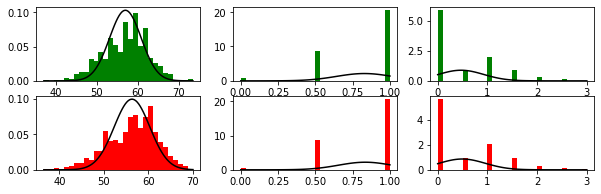

In [84]:
#@title **verifique su respuesta**
N=2
sano, enfe, p_s, p_e = fun_24261120(data_h, N)

plt.figure(figsize=(10,3))
for i in range(3):
  plt.subplot(2,3, i+1)
  plt.hist(sano[:,i], bins=30, density=True, color='green');
  t = np.linspace(np.min(sano[:,i]), np.max(sano[:,i]), 100)
  plt.plot(t, p_s[i].pdf(t), color="black");
for i in range(3):
  plt.subplot(2,3, i+4)
  plt.hist(enfe[:,i], bins=30, density=True, color='red');
  t = np.linspace(np.min(enfe[:,i]), np.max(enfe[:,i]), 100)
  plt.plot(t, p_e[i].pdf(t),  color="black");


In [76]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_24261120 $src24261120

sanos:  (138, 3) enfermos: (165, 3)
enfe_array:  (1000, 3)
enfe_array:  (1000, 13)
evaluation result CORRECT


# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "quiz01" #@param {type:"string"}
codigo_name = "q01_12345" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

quiz01 q01_12345


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>